# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, median_absolute_error, r2_score, mean_squared_error

# Loading Dataset

In [2]:
df = pd.read_csv("..\\Datasets\\uber.csv")
print(f"Dataset loaded to dataframe df having dimensions {df.shape}")

Dataset loaded to dataframe df having dimensions (200000, 9)


# Exploring Dataset

## Dimensions and Size

In [3]:
print(f"No. of Rows : {df.shape[0]}\nNo. of Columns : {df.shape[1]}\nTotal No. of Cells : {df.size}")

No. of Rows : 200000
No. of Columns : 9
Total No. of Cells : 1800000


## Displaying Sample Rows

In [4]:
print("Top 5 rows")
display(df.head())

Top 5 rows


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
print("Last 5 rows")
display(df.tail())

Last 5 rows


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [6]:
print("Randomly selected 5 rows")
display(df.sample(5))

Randomly selected 5 rows


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
187745,31179780,2012-10-05 12:25:48.0000006,12.0,2012-10-05 12:25:48 UTC,-73.947917,40.771271,-73.947917,40.771271,1
188901,27941674,2010-12-28 18:09:40.0000002,4.5,2010-12-28 18:09:40 UTC,-73.980293,40.754256,-73.984324,40.746722,1
185322,3279627,2014-02-15 15:41:18.0000001,10.0,2014-02-15 15:41:18 UTC,-73.985399,40.720404,-73.992673,40.737401,3
11499,10603937,2012-05-25 18:28:00.00000041,10.5,2012-05-25 18:28:00 UTC,-73.988690,40.741242,-73.957168,40.768405,5
14593,48581336,2014-12-13 23:16:00.000000272,4.5,2014-12-13 23:16:00 UTC,-73.979225,40.781887,-73.976720,40.790977,1


## Metadata

In [7]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


None

## Statistical Summary

In [8]:
display(df.describe())

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


# Data Preprocessing

## Checking Datatypes Compatibility

In [9]:
print("Before Datatype Conversion")
display(df.dtypes)

Before Datatype Conversion


Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [10]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
print(df['pickup_datetime'].dtype)

datetime64[ns, UTC]


In [11]:
print("After Datatype Conversion")
display(df.dtypes)

After Datatype Conversion


Unnamed: 0                         int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

## Handling NULL Values

In [12]:
print(f"NULL values per column : \n{df.isnull().sum()}\nTotal NULL Values : {df.isnull().sum().sum()}")

NULL values per column : 
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64
Total NULL Values : 2


In [13]:
df.nunique()

Unnamed: 0           200000
key                  200000
fare_amount            1244
pickup_datetime      196629
pickup_longitude      71066
pickup_latitude       83835
dropoff_longitude     76894
dropoff_latitude      90585
passenger_count           8
dtype: int64

In [14]:
print("Dropping Rows with NULL values")
df.dropna(inplace=True)

Dropping Rows with NULL values


In [15]:
print(f"NULL values per column : \n{df.isnull().sum()}\nTotal NULL Values : {df.isnull().sum().sum()}")

NULL values per column : 
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64
Total NULL Values : 0


## Handling Inappropriate Lattitude & Longitude Values

In [16]:
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
                                (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
                                (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
                                (df.dropoff_longitude > 180) |(df.dropoff_longitude < -180)
                                ]

In [17]:
print(f"No. of Rows with Inappropriate Lattitude and Longitude Values : {incorrect_coordinates.shape[0]}")

No. of Rows with Inappropriate Lattitude and Longitude Values : 12


In [18]:
df.drop(index = incorrect_coordinates.index, inplace=True)

In [ ]:
print(f"No. of Rows after dropping incorrect coordinates: {df.shape[0]}")

## Handling Negative Fare Values

In [19]:
negative_fare_rows = df[df['fare_amount'] < 0]
print("Rows with negative fare_amount values:")
display(negative_fare_rows)
print(f"\nNumber of rows with negative fare_amount: {len(negative_fare_rows)}")

Rows with negative fare_amount values:


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
63395,30260042,2015-03-03 23:07:41.0000008,-5.00,2015-03-03 23:07:41+00:00,-73.992249,40.748936,-73.988518,40.748180,1
71246,51325304,2010-02-11 21:47:10.0000001,-3.30,2010-02-11 21:47:10+00:00,-73.952725,40.768235,-73.949928,40.772208,2
79903,50284253,2015-05-01 14:43:02.0000004,-3.50,2015-05-01 14:43:02+00:00,-73.982430,40.775024,-73.981750,40.778439,1
89322,26673143,2010-03-09 08:26:10.0000006,-49.57,2010-03-09 08:26:10+00:00,-73.972772,40.785657,-73.972867,40.785500,5
92063,10267585,2010-03-12 08:49:10.0000002,-23.70,2010-03-12 08:49:10+00:00,-73.952740,40.768233,-74.007028,40.707338,3
98875,51135168,2015-03-20 21:31:14.0000007,-52.00,2015-03-20 21:31:14+00:00,-74.000359,40.728729,-74.005699,40.728680,5
104080,21688700,2010-03-09 20:25:10.0000002,-7.30,2010-03-09 20:25:10+00:00,-73.952623,40.766942,-73.953787,40.784882,1
111589,13971251,2015-02-23 19:26:44.0000004,-52.00,2015-02-23 19:26:44+00:00,-73.984665,40.759026,0.000000,0.000000,5
139272,40714150,2010-02-23 18:52:10.0000003,-6.90,2010-02-23 18:52:10+00:00,-73.988727,40.736445,-73.977622,40.750487,1
148803,34933571,2010-02-12 10:50:10.0000005,-5.70,2010-02-12 10:50:10+00:00,-73.977300,40.742783,-73.988837,40.747465,3



Number of rows with negative fare_amount: 17


In [20]:
df.drop(df[df['fare_amount'] < 0].index, inplace=True)
print(f"Number of rows after dropping negative fare_amount: {len(df)}")

Number of rows after dropping negative fare_amount: 199970


## Handling Outliers

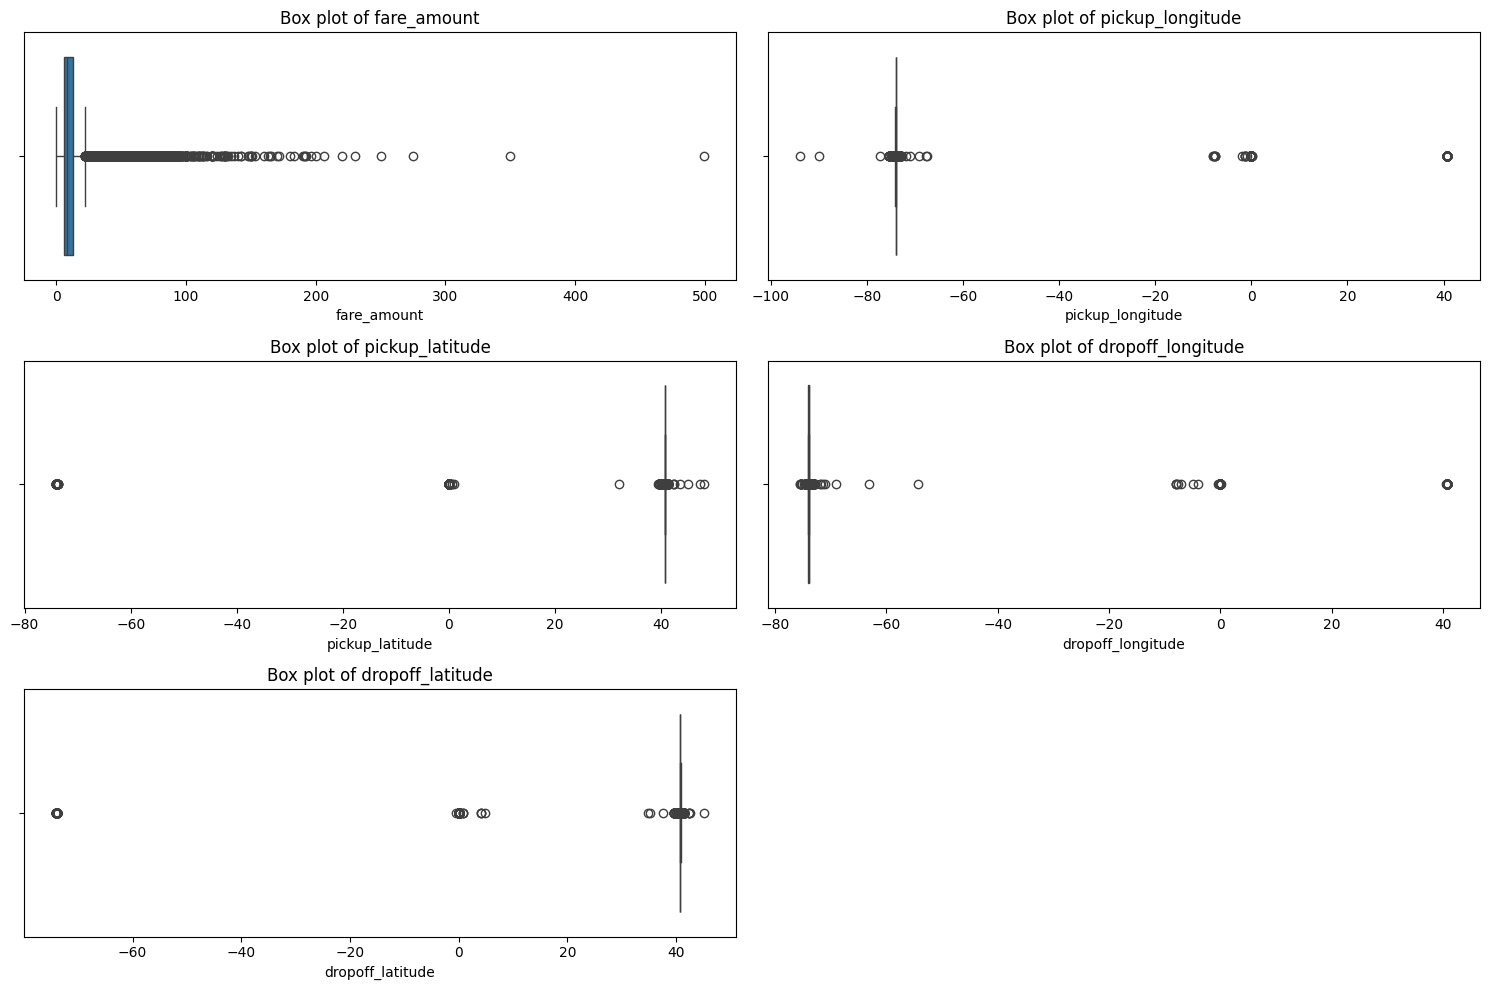

In [21]:
columns_to_plot = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_plot):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [22]:
columns_to_clean = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

for col in columns_to_clean:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df.drop(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index, inplace=True)
    print(f"Number of rows after removing outliers in {col}: {len(df)}")

Number of rows after removing outliers in fare_amount: 182816
Number of rows after removing outliers in pickup_longitude: 175821
Number of rows after removing outliers in pickup_latitude: 173239
Number of rows after removing outliers in dropoff_longitude: 170413
Number of rows after removing outliers in dropoff_latitude: 166867


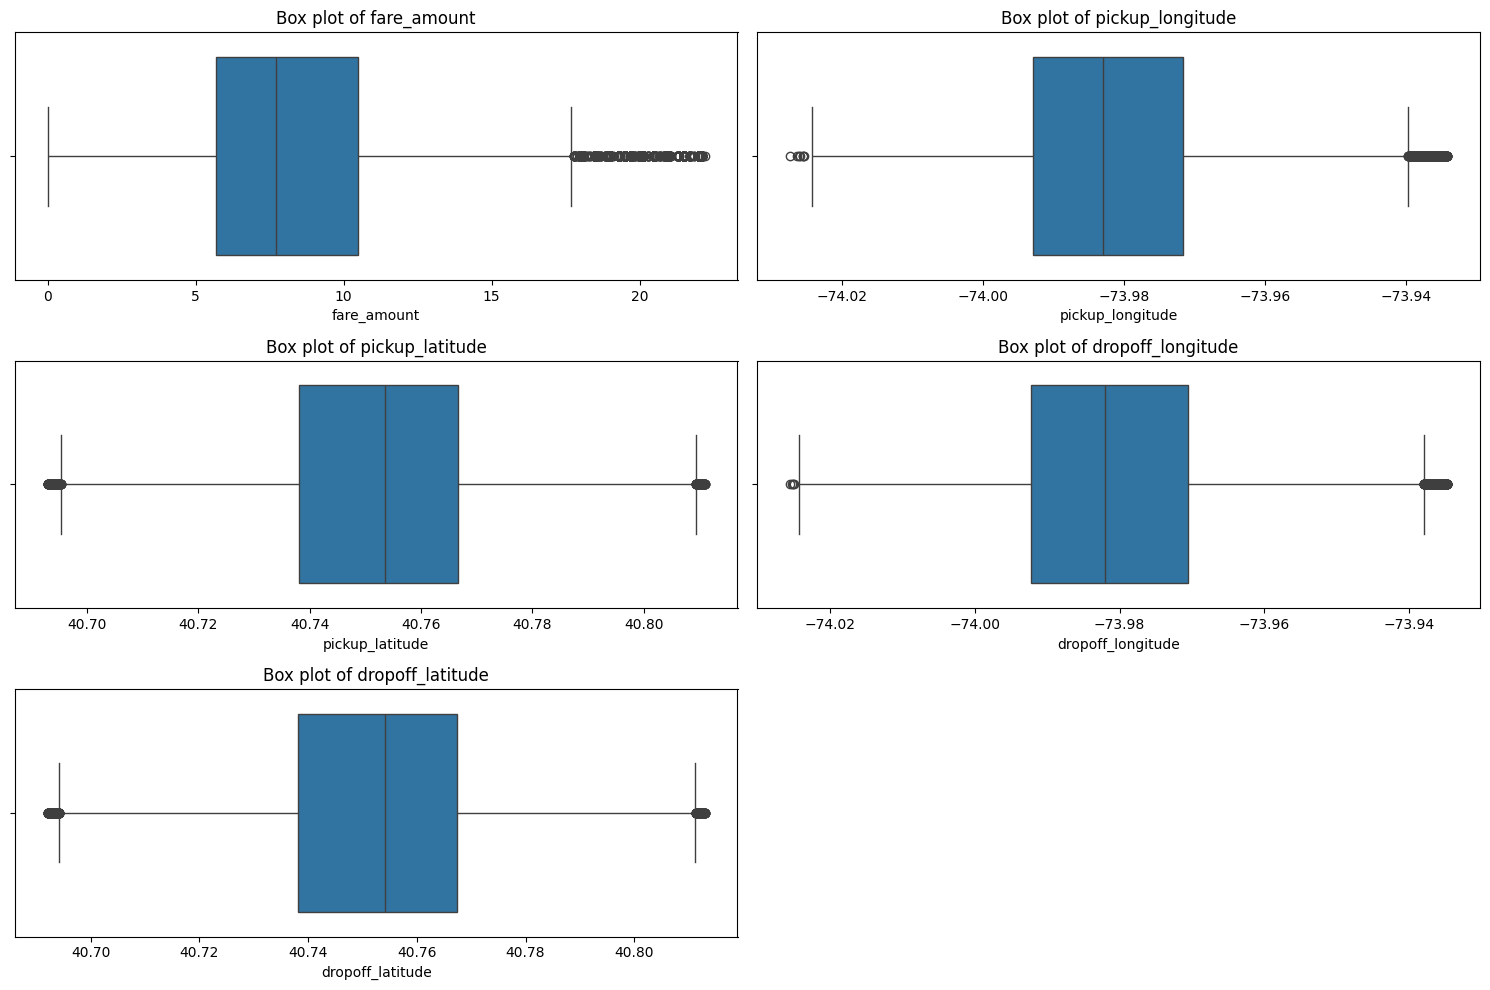

In [23]:
columns_to_plot = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_plot):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Feature Engineering

In [24]:
print("Initial Features")
df.columns

Initial Features


Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

## Adding Distance Feature

In [25]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in kilometers

    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

In [26]:
df['distance_km'] = df.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
display(df.head())

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,0.000000


## Adding Time Details

In [27]:
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

df.drop('pickup_datetime', axis=1, inplace=True)

display(df.head())

,Unnamed: 0,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,hour,day,month,year,day_of_week
0,24238194,2015-05-07 19:52:06.0000003,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,19,7,5,2015,3
1,27835199,2009-07-17 20:04:56.0000002,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,20,17,7,2009,4
2,44984355,2009-08-24 21:45:00.00000061,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,21,24,8,2009,0
3,25894730,2009-06-26 08:22:21.0000001,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,8,26,6,2009,4
5,44470845,2011-02-12 02:27:09.0000006,4.9,-73.969019,40.755910,-73.969019,40.755910,1,0.000000,2,12,2,2011,5


## Eliminating Non-Essential Feature

In [28]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('key', axis=1, inplace=True)

In [29]:
print("Total Features after Feature Engineering")
display(df.dtypes)

Total Features after Feature Engineering


fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
distance_km          float64
hour                   int32
day                    int32
month                  int32
year                   int32
day_of_week            int32
dtype: object

# EDA

## Correlation Matrix

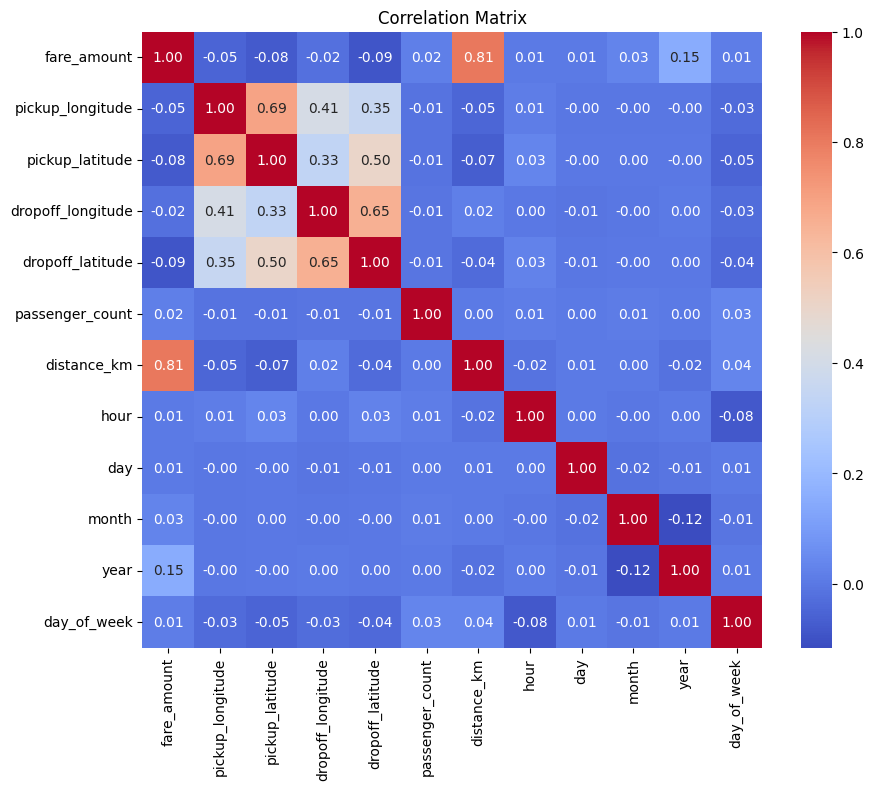

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Distribution of Fare Amount

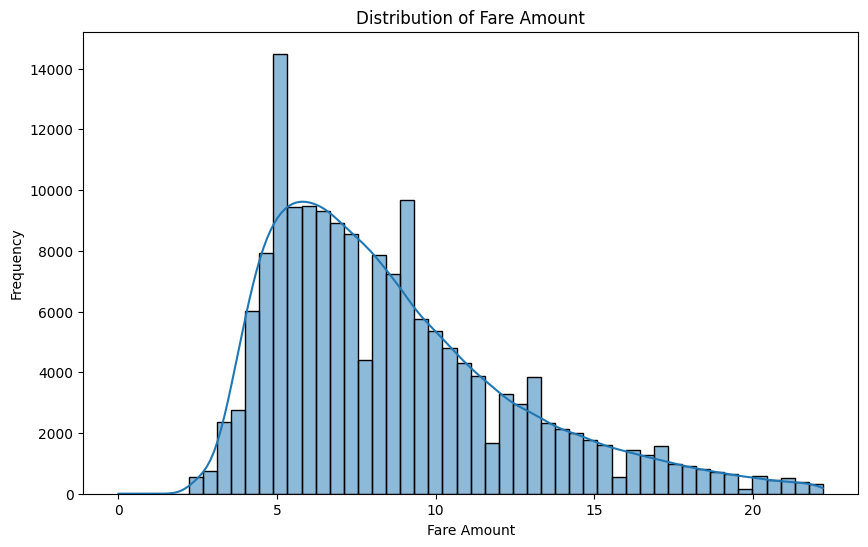

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

## Fare Amount vs. Time of Day

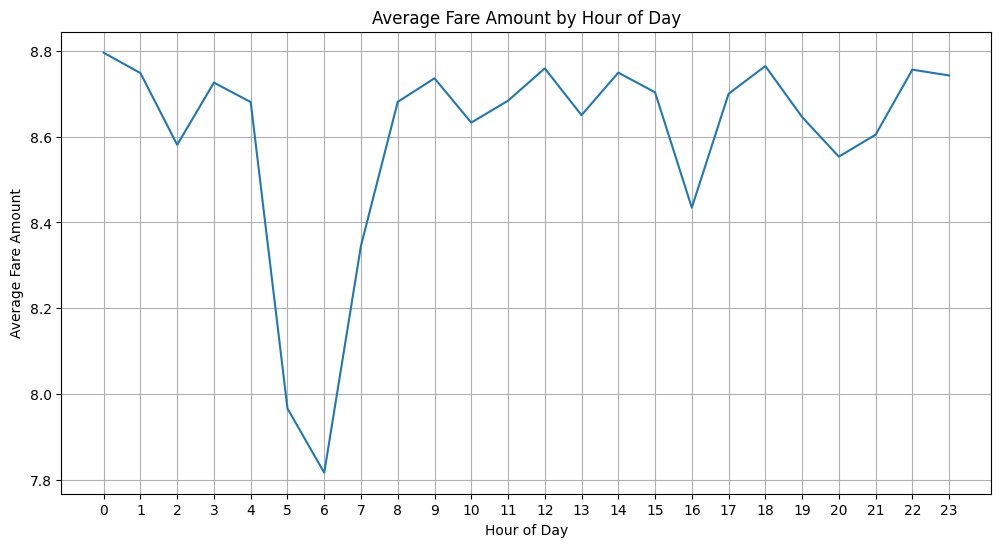

In [32]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='fare_amount', data=df.groupby('hour')['fare_amount'].mean().reset_index())
plt.title('Average Fare Amount by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare Amount')
plt.xticks(range(24))
plt.grid(True)
plt.show()

## Fare Amount vs. Day of Week

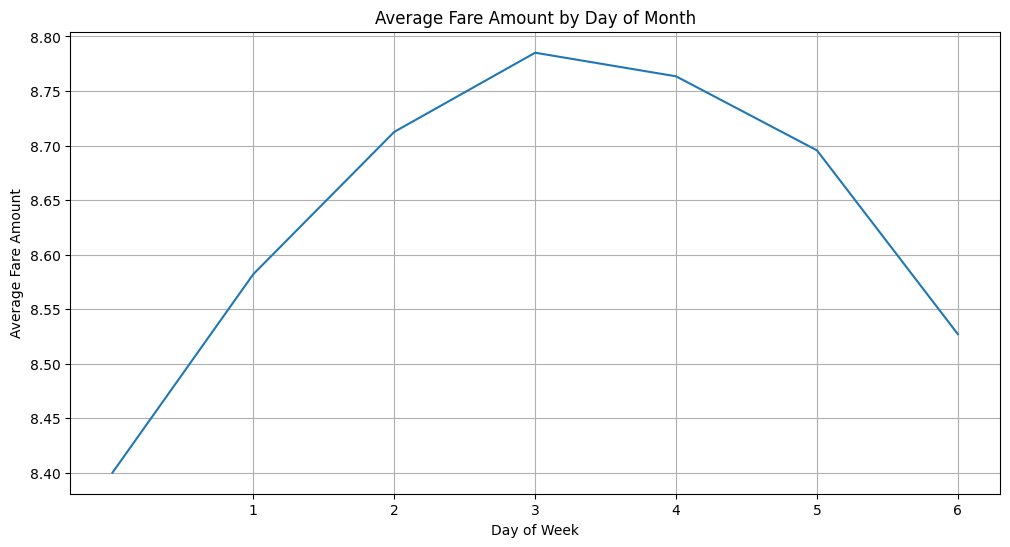

In [33]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='day_of_week', y='fare_amount', data=df.groupby('day_of_week')['fare_amount'].mean().reset_index())
plt.title('Average Fare Amount by Day of Month')
plt.xlabel('Day of Week')
plt.ylabel('Average Fare Amount')
plt.xticks(range(1, 7))
plt.grid(True)
plt.show()

## Fare Amount vs. Day of Month

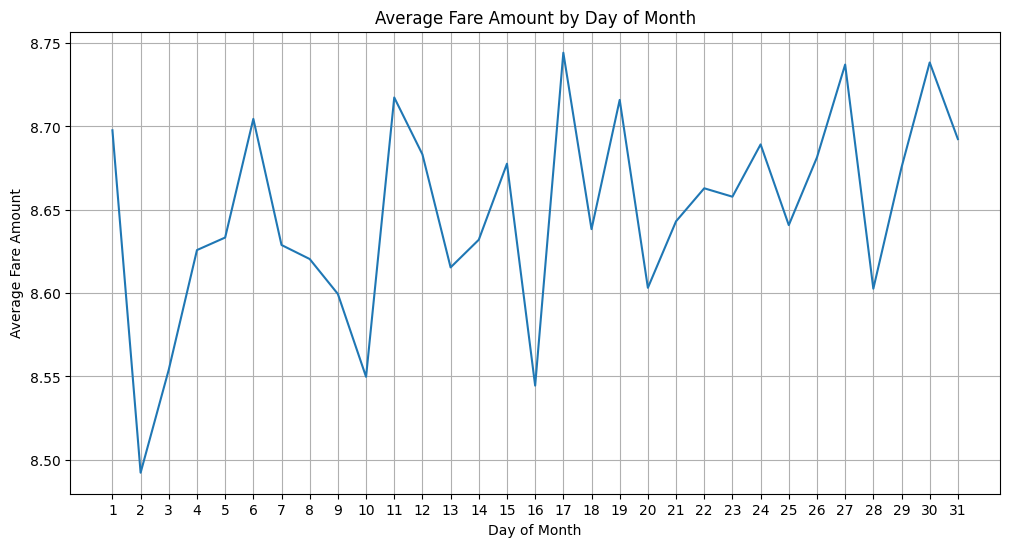

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='day', y='fare_amount', data=df.groupby('day')['fare_amount'].mean().reset_index())
plt.title('Average Fare Amount by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Average Fare Amount')
plt.xticks(range(1, 32))
plt.grid(True)
plt.show()

## Fare Amount vs. Month of Year

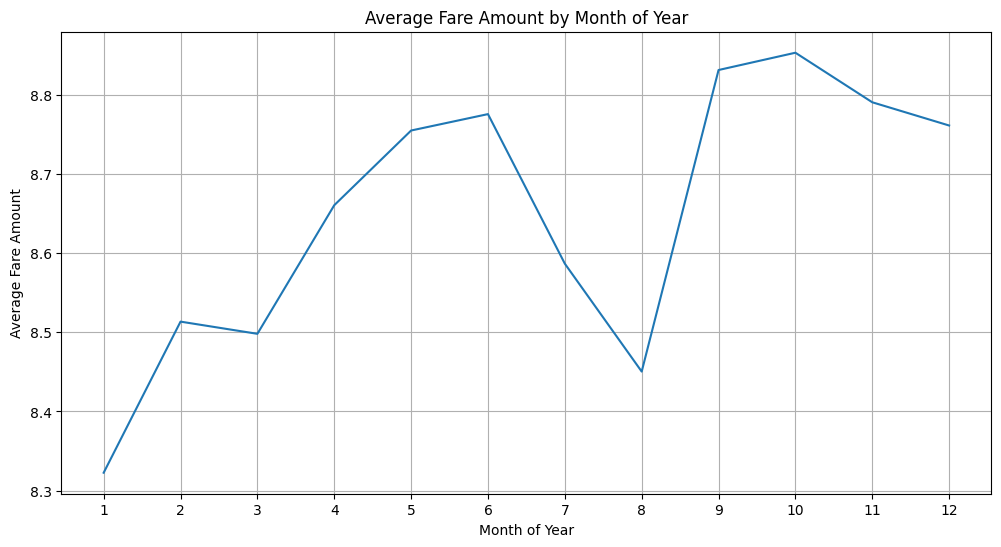

In [35]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='fare_amount', data=df.groupby('month')['fare_amount'].mean().reset_index())
plt.title('Average Fare Amount by Month of Year')
plt.xlabel('Month of Year')
plt.ylabel('Average Fare Amount')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

# Models Training

## Data Spliting

In [36]:
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [37]:
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])


pipeline_rf = Pipeline([
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

## Training with Pipelines

In [38]:
print("Training Linear Regression model...")
pipeline_lr.fit(X_train, y_train)

print("\nTraining Random Forest model...")
pipeline_rf.fit(X_train, y_train)

Training Linear Regression model...

Training Random Forest model...


Pipeline(steps=[('regressor', RandomForestRegressor(random_state=42))])

# Model Evaluation and Comparison

In [39]:
y_pred_linear = pipeline_lr.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)

In [40]:
results = {
    "Linear Regression": {
        "R-squared": r2_score(y_test, y_pred_linear),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_linear)),
        "MAE": mean_absolute_error(y_test, y_pred_linear)
    },
    "Random Forest": {
        "R-squared": r2_score(y_test, y_pred_rf),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        "MAE": mean_absolute_error(y_test, y_pred_rf)
    }
}

results_df = pd.DataFrame(results).T
results_df = results_df[["R-squared", "RMSE", "MAE"]]
results_df = results_df.round(4)

print("\n--- Comprehensive Model Comparison ---")
print(results_df)


--- Comprehensive Model Comparison ---
                   R-squared    RMSE     MAE
Linear Regression     0.6873  2.1703  1.5458
Random Forest         0.7637  1.8864  1.3019
